In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
cancer['data'].shape

(569, 30)

In [16]:
cancer["target"].shape

(569,)

In [35]:
df = pd.DataFrame(cancer.data[:,0:2], columns=cancer.feature_names[0:2])
df["class"] = cancer.target
df["class"] = np.where(df["class"] == 0, "malignant", "benign")
df.sample(5, random_state=1)

,mean radius,mean texture,class
421,14.69,13.98,benign
47,13.17,18.66,malignant
292,12.95,16.02,benign
186,18.31,18.58,malignant
414,15.13,29.81,malignant


In [36]:
df.isnull().sum()

mean radius     0
mean texture    0
class           0
dtype: int64

<Axes: xlabel='mean radius', ylabel='mean texture'>

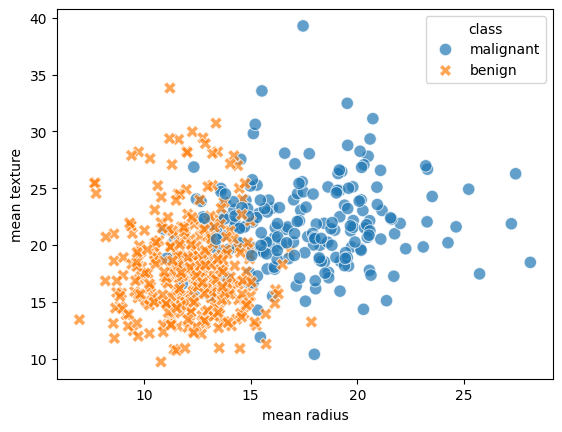

In [40]:
sns.scatterplot(data=df, x="mean radius", y="mean texture", hue="class", style="class", alpha=0.7, edgecolor="w", s=80)

In [91]:
class_names, y = np.unique(df["class"], return_inverse=True)

print(class_names)
print(y[40:60])

# show class distribution
df["class"].value_counts()

['benign' 'malignant']
[1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0]


class
benign       357
malignant    212
Name: count, dtype: int64

In [48]:
# create x variable
X = df.drop("class", axis=1)
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [63]:
from sklearn.preprocessing import StandardScaler

# standardize the data
sc = StandardScaler()

X_sc = sc.fit_transform(X)
X_sc

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       ...,
       [ 0.70228425,  2.0455738 ],
       [ 1.83834103,  2.33645719],
       [-1.80840125,  1.22179204]])

<Axes: title={'center': 'After Standard Scaler'}, ylabel='Density'>

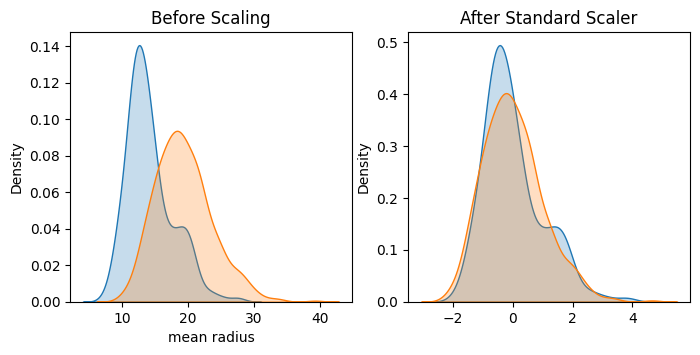

In [72]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(8,3.5))

ax1.set_title("Before Scaling")
sns.kdeplot(df["mean radius"], ax=ax1, fill=True)
sns.kdeplot(df["mean texture"], ax=ax1, fill=True)  

ax2.set_title("After Standard Scaler")
sns.kdeplot(X_sc[:,0], ax=ax2, fill=True)
sns.kdeplot(X_sc[:,1], ax=ax2, fill=True) 

In [73]:
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(426, 2) (426,) (143, 2) (143,)


In [74]:
X_train[0:5]

array([[ 0.31034466,  2.63664885],
       [ 0.23650097, -0.04413248],
       [ 0.15697699,  0.19555543],
       [-1.0813249 , -0.68407594],
       [-0.64678318, -0.42577149]])

In [75]:
y_train[0:5]

array([1, 0, 1, 0, 0])

In [77]:
# sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# create model
model = Sequential()

# add input layer 32 neurons
model.add(Dense(32, input_dim=2, activation="relu"))

# add output layer 1 neuron
model.add(Dense(1, activation="sigmoid"))

# compile summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                96        
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_1_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 2),
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_

In [80]:
model.input_shape
model.output_shape

(None, 1)

In [81]:
# compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [82]:
# train model
import time
start = time.time()
history = model.fit(X_train, y_train, validation_split=0.25, epochs=20, batch_size=32, verbose=1)

end = time.time()
print("Time taken to train the model: ", round(end-start, 2), "seconds")

Epoch 1/20


2023-10-22 09:11:49.171409: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 0s 8ms/step - loss: 0.5785 - accuracy: 0.8966 - val_loss: 0.5669 - val_accuracy: 0.8598
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.9091 - val_loss: 0.5358 - val_accuracy: 0.8692
Epoch 3/20
10/10 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.9091 - val_loss: 0.5078 - val_accuracy: 0.8598
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.9060 - val_loss: 0.4831 - val_accuracy: 0.8411
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.9091 - val_loss: 0.4607 - val_accuracy: 0.8411
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.9091 - val_loss: 0.4406 - val_accuracy: 0.8505
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.9091 - val_loss: 0.4228 - val_accuracy: 0.8505
Epoch 8/20
10/10 [=============

5/5 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8252
Test loss: 0.369030237197876
Test Accuracy: 0.8251748085021973


Text(0.5, 1.0, 'Loss')

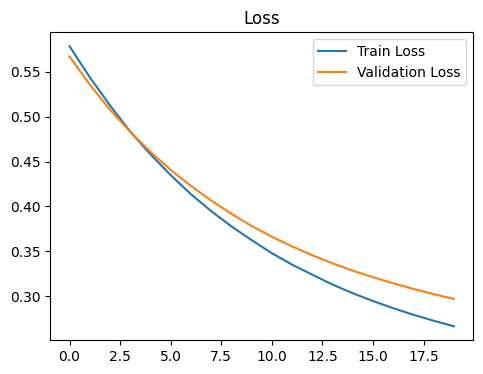

In [83]:
# evaluate model
score = model.evaluate(X_test, y_test, verbose=1)

print("Test loss:", score[0])
print("Test Accuracy:", score[1])



# plot loss and accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")


In [92]:
y_pred_pr = model.predict(X_test)
y_pred_pr[0:5]

5/5 [==============================] - 0s 469us/step


array([[0.11060482],
       [0.21513467],
       [0.10766422],
       [0.79744357],
       [0.77936876]], dtype=float32)

In [93]:
# threshold = 0.5
y_pred = np.where(y_pred_pr > 0.5, 1, 0)
y_pred[0:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [95]:
# confusion matrix report
from sklearn.metrics import confusion_matrix, classification_report

print("score: ", score) # loss and accuracy
print("classification_report: ",classification_report(y_test, y_pred))
print("confusion_matrix: ", confusion_matrix(y_test, y_pred))

score:  [0.369030237197876, 0.8251748085021973]
classification_report:                precision    recall  f1-score   support

           0       0.85      0.88      0.86        88
           1       0.79      0.75      0.77        55

    accuracy                           0.83       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.83      0.82       143

confusion_matrix:  [[77 11]
 [14 41]]


In [99]:
# plot loss and accuracy
df_history = pd.DataFrame(history.history)
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss')

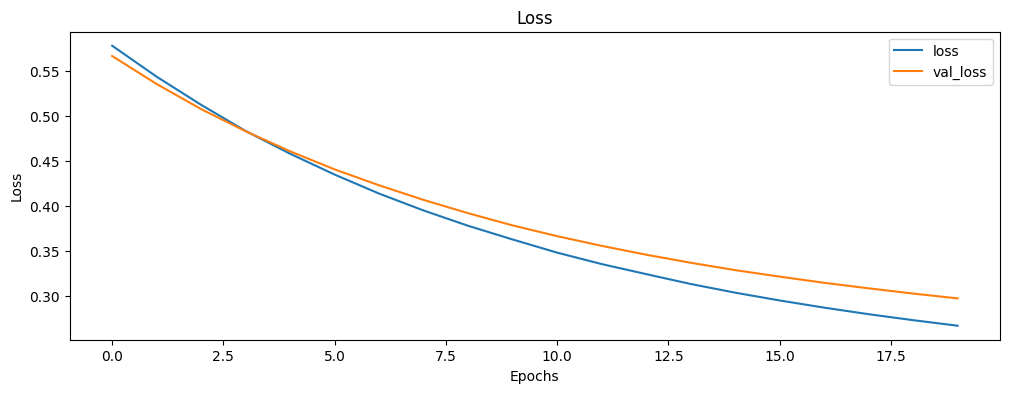

In [116]:
df_history[["loss", "val_loss"]].plot(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")


Text(0.5, 1.0, 'Accuracy')

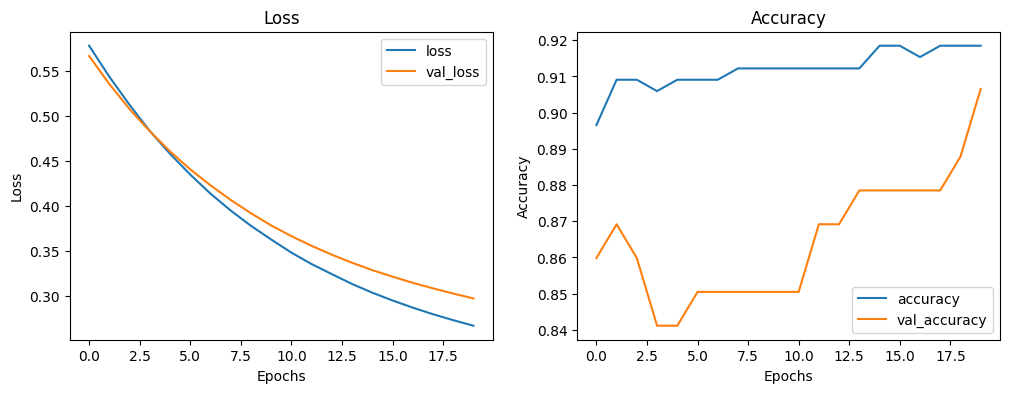

In [117]:
# create two plots side by side from loss and accuracy
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

# plot loss
df_history[["loss", "val_loss"]].plot(ax=ax1)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Loss")

# plot accuracy
df_history[["accuracy", "val_accuracy"]].plot(ax=ax2)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy")


In [118]:
# using tensor board
from tensorflow.keras.callbacks import TensorBoard

In [119]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=32, verbose=1, callbacks=[TensorBoard(log_dir="logs")])

Epoch 1/30
10/10 [==============================] - 0s 3ms/step - loss: 0.2609 - accuracy: 0.9154 - val_loss: 0.2922 - val_accuracy: 0.9065
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9154 - val_loss: 0.2879 - val_accuracy: 0.9065
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9154 - val_loss: 0.2839 - val_accuracy: 0.9065
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9154 - val_loss: 0.2802 - val_accuracy: 0.9065
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.9154 - val_loss: 0.2768 - val_accuracy: 0.9065
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9154 - val_loss: 0.2734 - val_accuracy: 0.9065
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9154 - val_loss: 0.2705 - val_accuracy: 0.9065
Epoch 8/30
10/10 [==

In [ ]:
# load tensorboard
%load_ext tensorboard
%tensorboard --logdir logs


22500/22500 [==============================] - 4s 194us/step


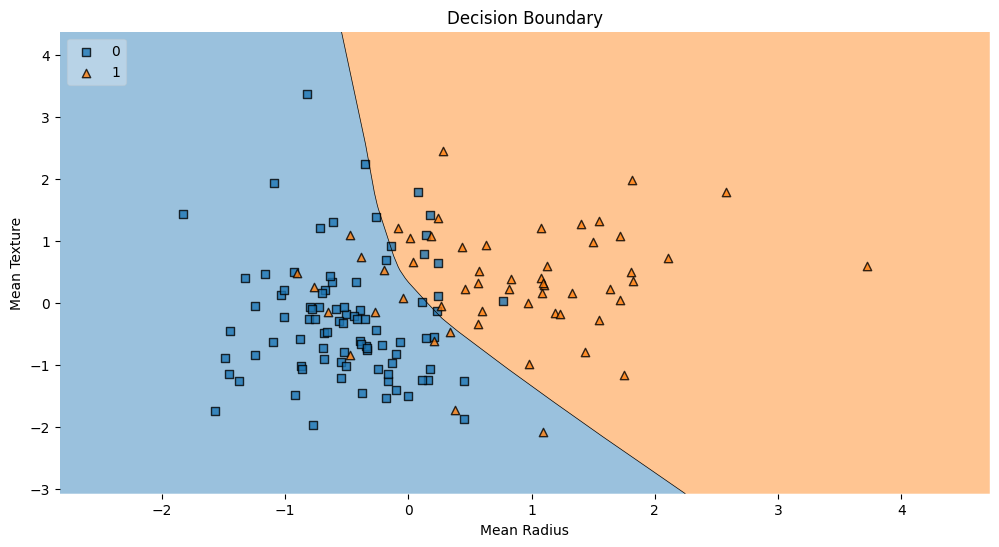

In [120]:
# plot region of decision
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,6))
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.title("Decision Boundary")
plt.show()

In [122]:
# new data to predict 
new_data = np.array([[15.0, 20.0],[20.0, 30.0], [16.0, 14.0]])

# standardize the data
X_new_sc = sc.transform(new_data)
X_new_sc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.24786153,  0.16530356],
       [ 1.66793252,  2.49237069],
       [ 0.53187573, -1.23093671]])

In [123]:
y_pred_pr = model.predict(X_new_sc)
y_pred = np.where(y_pred_pr > 0.5, 1, 0)
print(class_names[y_pred])

1/1 [==============================] - 0s 13ms/step
[['malignant']
 ['malignant']
 ['benign']]


In [124]:
# save h5 file
model.save("model_32node.h5")

In [126]:
# save model architecture as json
model_json = model.to_json()
with open("model_32node.json", "w") as json_file:
    json_file.write(model_json)

In [127]:
# save model as folder
model.save("model_32node_folder")

INFO:tensorflow:Assets written to: model_32node_folder/assets


In [128]:
# save scaler object as pickle file
import pickle

pickle.dump(sc, open("scaler.pkl", "wb"))

file_name = "classname.pkl"
open_file = open(file_name, "wb")
pickle.dump(class_names, open_file)
open_file.close()